Mounted at /content/gdrive
SLIC number of segments: 247


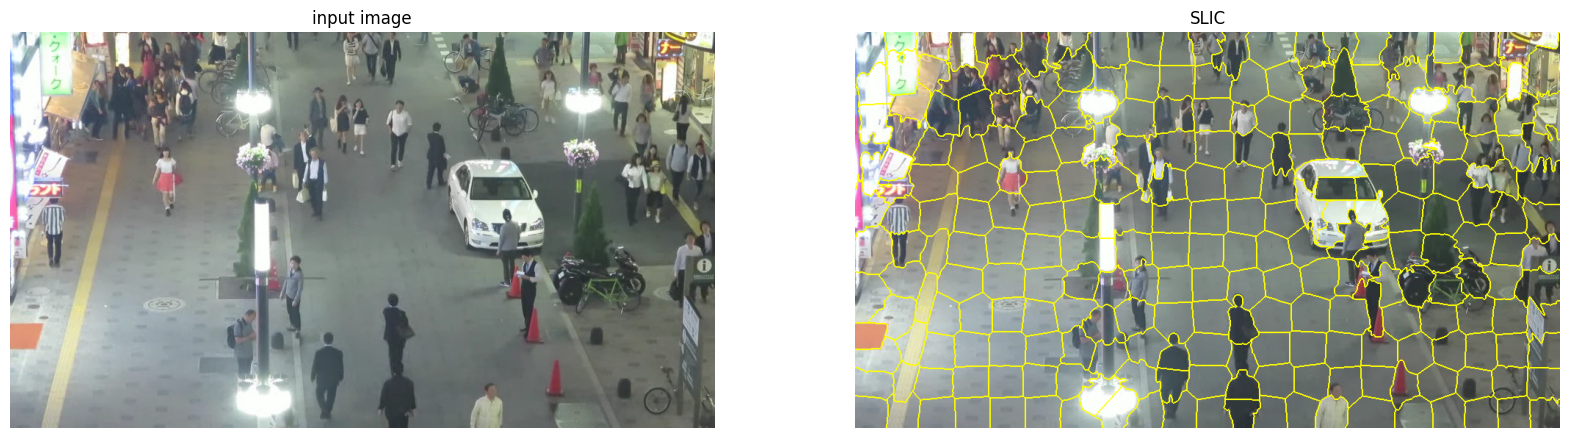

In [3]:
#연습 10-1) SLIC를 이용한 슈퍼 픽셀 알고리즘 구현하기
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2
drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/MOT16-1.png')
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
#BGR채널 순서를 RGB채널로 변경
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#SLIC알고리즘 적용
segments_slic = slic(img, n_segments=250, compactness=30, sigma=1, start_label=1)
#그룹 수를 화면에 표시하기
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
#결과 영상 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("input image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("SLIC")
plt.imshow(mark_boundaries(img, segments_slic))
plt.axis("off")
plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


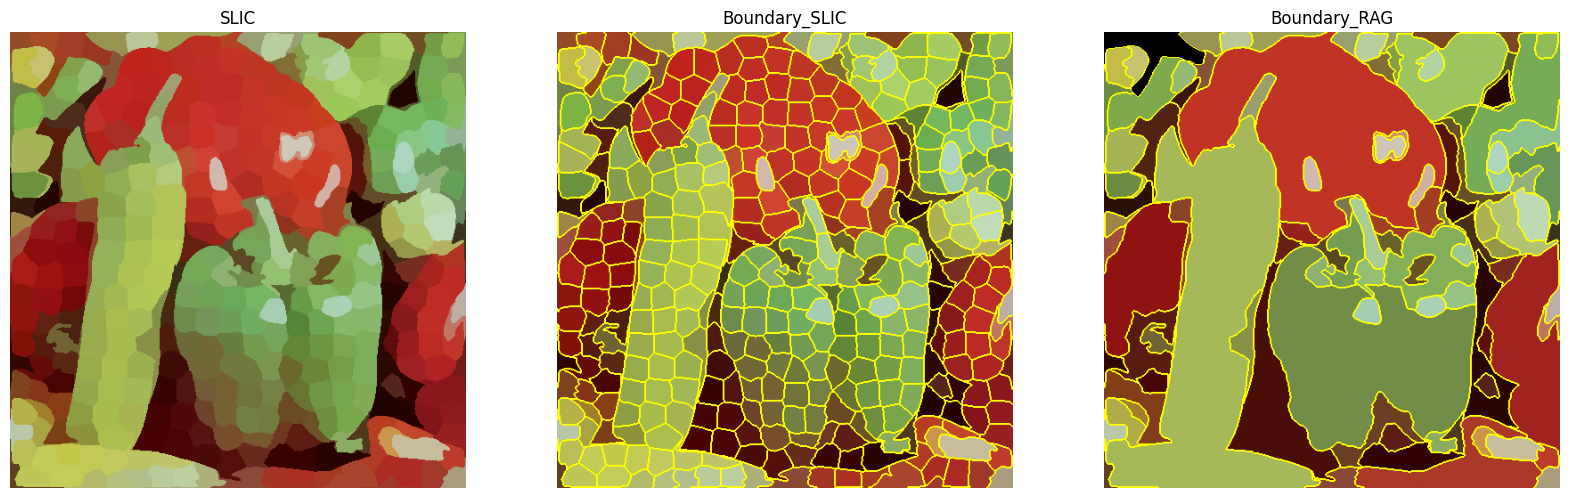

In [11]:
#연습 10-2) RAG를 이용한 슈퍼픽셀 병합 알고리즘 구현하기
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from google.colab import drive
import cv2
drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/peppers.jpg')
#BGR채널 순서를 RGB채널로 변경
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#SLIC 알고리즘을 사용하여 이미지를 분할. SLIC 알고리즘은 각 영역에 고유한 레이블을 할당.
#각 픽셀의 레이블은 레이블 배열에 저장
labels1 = slic(img, n_segments=400, compactness=30, sigma=1,start_label=1)
#label2rgb 함수는 한 영역(동일한 레이블을 가짐)에 속하는 모든 픽셀에 특정 색상을 할당
# 이 경우 각 픽셀은 해당 영역의 평균 RGB 색상으로 대체
out1 = color.label2rgb(labels1, img, kind='avg')
#동일 레이블을 갖는 영역들에 대해 경계선 표시
label_rgb1 = mark_boundaries(out1, labels1)
#RAG 적용 (영역간의 색상만으로 그래프 병함)
g = graph.rag_mean_color(img, labels1)
#각 영역별 색상 가중치가 임계값(29) 이하이면 병합
labels2 = graph.cut_threshold(labels1, g, 29)
#RAG이후 동일 레이블에 해당하는 픽셀들의 평균값으로 채워주기
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)
#동일 레이블을 갖는 영역들에 대해 경계선 표시
label_rgb2 = mark_boundaries(out2, labels2)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title("SLIC")
plt.imshow(out1)
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Boundary_SLIC")
plt.imshow(label_rgb1)
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Boundary_RAG")
plt.imshow(label_rgb2)
plt.axis("off")
plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


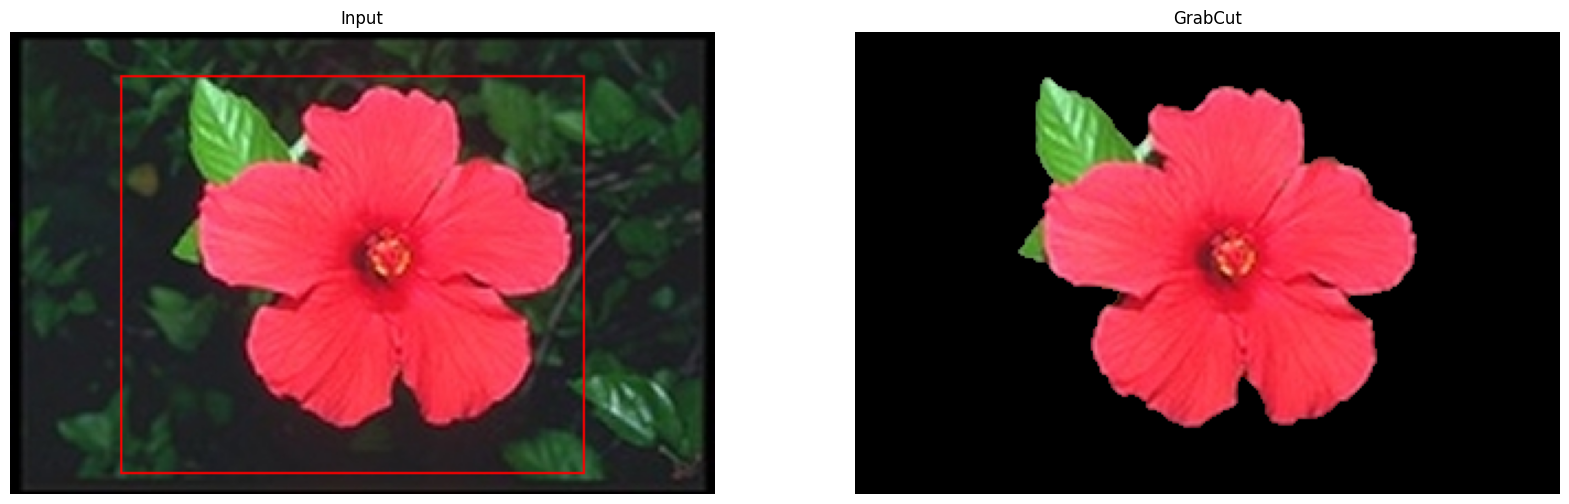

In [8]:
#연습 10-3) GrabCut을 이용한 영상 분할 알고리즘 구현하기
from matplotlib import pyplot as plt
from google.colab import drive
import numpy as np
import cv2

drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/flower.bmp')
#BGR채널 순서를 RGB채널로 변경
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#영상크기(height, width)를 받아오고 영상 크기 만큼의 리스트를 모두 0으로 초기화한 마스크를 생성
#마스크 - 배경, 전경 또는 가능한 배경/전경 등의 영역을 지정(레이블)하는 이미지
mask = np.zeros(img.shape[:2],np.uint8)

#배경 및 전경 모델
#크기가 (1,65)인 두 개의 np.float64 유형 0 배열을 만듦
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#전경과 배경을 나눌 사각형 영역 설정
rec = (50,20,210,180)
#GrabCut적용, 반복회수 5회
cv2.grabCut (img,mask,rec,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# 마스크 수정
mask2 = np.where((mask==2)|(mask==0),0,1).astype( 'uint8' )
#마스크의 차원을 늘려 입력 영상과 곱(마스킹) 적용
imgout = img*mask2[:,:,np.newaxis]
#사각형 박스와 그랩컷 영상 출력
cv2.rectangle(img, (50,20), (260,200), (255,0,0))
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("GrabCut")
plt.imshow(imgout)
plt.axis("off")
plt.show()

In [ ]:
#연습 10-4) 마우스 이벤트와 GrabCut을 이용한 영상 분할 구현하기
#Jupyter Notebook에서 실행해야함.
import cv2
import numpy as np

#영상 불러오기
img = cv2.imread('D:/flower.bmp')

img_show=np.copy(img)
#영상크기(height, width)를 받아오고 영상 크기 만큼의 리스트를 모두 0으로 초기화한 마스크를 생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[:,:]=cv2.GC_PR_BGD

bgdModel = np.zeros((1, 65), np.float64) # 배경 모델 무조건 1행 65열, float64
fgdModel = np.zeros((1, 65), np.float64) # 전경 모델 무조건 1행 65열, float64

BrushSize=9
LColor,RColor=(255,0,0),(0,0,255)

# 마우스 이벤트 처리 함수 등록
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: # 왼쪽 버튼은 전경
        cv2.circle(img_show, (x, y), BrushSize, LColor, -1) # 파랑색 색칠
        cv2.circle(mask, (x, y), BrushSize, cv2.GC_FGD, -1) # 마스크에 전경 강제 지정

    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪽 버튼은 배경
        cv2.circle(img_show, (x, y), BrushSize, RColor, -1) # 빨강색 원
        cv2.circle(mask, (x, y), BrushSize, cv2.GC_BGD, -1) # 마스크에 배경 강제 지정

    elif event == cv2.EVENT_MOUSEMOVE: # 마우스 움직임
        if flags & cv2.EVENT_FLAG_LBUTTON: # 왼쪽 누르고 움직이면 전경
            cv2.circle(img_show, (x, y),BrushSize, LColor, -1)
            cv2.circle(mask, (x, y), BrushSize, cv2.GC_FGD, -1)
        elif flags & cv2.EVENT_FLAG_RBUTTON: # 오른쪽 누르고 움직이면 배경
            cv2.circle(img_show, (x, y),BrushSize, RColor, -1)
            cv2.circle(mask, (x, y),BrushSize, cv2.GC_BGD, -1)

    cv2.imshow('Painting', img_show)

cv2.namedWindow('Painting')
cv2.setMouseCallback('Painting', on_mouse)

while True:
    key = cv2.waitKey()
    if key == 13: #return
        cv2.grabCut(img, mask,None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK) # 마스크 초기화
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        dst = img * mask2[:, :, np.newaxis]
        cv2.imshow('GrabCut image',dst)

    elif key == 27: #esc
        break

cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)#<=====here

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [2]:
!pip install pyqt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 6.9 MB/s eta 0:00:00
